In [1]:
from math import cos, sin, pi
def func(x):
    """
    计算函数值
    """

    if x > 0:
        value = (sin(x)**2 + cos(x)+1)**3 - \
            3*(sin(x)**2 + cos(x))
    elif x < 0:
        value == 4 * (sin(x))**2 + 4 * cos(x) - 1
    else:
        value = pi
    return value


if __name__ == "__main__":
    x = float(input("Please input a value: "))
    value = func(x)
    print(value)

Please input a value: 5
7.084907914157595


In [2]:
def encode():
    x = input("请输入一个四位整数： ")
    num_list = [(int(i)+9)%10 for i in x]
    num_list[0],num_list[2] = num_list[2],num_list[0]
    num_list[1],num_list[3] = num_list[3],num_list[1]
    for i in num_list:
        print(i, end='')

if __name__ == "__main__":
    encode()

请输入一个四位整数： 2020
1919

In [3]:
def search():
    prompt= \
    """
[1] 苹果
[2] 梨
[3] 橘子
[4] 葡萄
[0] 退出
    """
    times = 4
    print(prompt)
    choice = input("请输入序号进行查询: ")
    while choice !='0':
        if choice == '1':
            print("苹果 3.00 元/kg")
        elif choice == '2':
            print("梨 2.50 元/kg")
        elif choice == '3':
            print("橘子 4.10 元/kg")
        elif choice == '4':
            print("葡萄 10.20 元/kg")
        else:
            print("输入不合法，重新输入")
            break
        times -= 1
        if times == 0:
            print("次数使用完！ 按Enter退出...")
            input()
            break
        input("再次输入请按Enter...")
        print(prompt)
        choice = input("请输入序号进行查询: ")
        
if __name__ == '__main__':
    search()


[1] 苹果
[2] 梨
[3] 橘子
[4] 葡萄
[0] 退出
    
请输入序号进行查询: 3
橘子 4.10 元/kg
再次输入请按Enter...5

[1] 苹果
[2] 梨
[3] 橘子
[4] 葡萄
[0] 退出
    
请输入序号进行查询: 4
葡萄 10.20 元/kg
再次输入请按Enter...

[1] 苹果
[2] 梨
[3] 橘子
[4] 葡萄
[0] 退出
    
请输入序号进行查询: 0


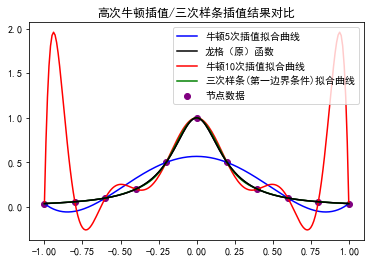

In [4]:
# 高次插值多项式的龙格现象.py
import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np


'''牛顿插值多项式'''
def newton_dd(x: list, f: list, n: int):  # 此处 n表示多项式阶数，为节点数-1
    dd = [0 for _ in range(n)]  # divided difference

    for i in range(n):
        for j in range(n-1, i-1, -1):  # n-1,n-2,...,i 必须从后往前
            if i == 0:
                dd[j] = (f[j+1] - f[j]) / (x[j+1] - x[j])
            else:
                dd[j] = (dd[j] - dd[j-1]) / (x[j+1] - x[j-i])
    return dd

def get_function(data: np.ndarray, x: list, f: list, n: int):
    parm = newton_dd(x, f, n)
    #print(parm)
    res = f[0]
    w = 1
    for i in range(n):
        w *= data - x[i]
        res += parm[i] * w

    return res


'''三次样条插值法'''
def SI_dd(x: list, f: list, n: int):  # n-节点数   只要二阶均差
    dd = [0 for _ in range(0, n - 1)]  # divided difference

    for i in range(0, 2):
        for j in range(0, n - 1 - i):  # 0, 1, 2, 3
            if i == 0:
                dd[j] = (f[j + 1] - f[j]) / (x[j + 1] - x[j])
            else:
                dd[j] = (dd[j + 1] - dd[j]) / (x[j + 2] - x[j])
    # print(dd)
    return dd

def solve_m(x: list, f: list, n: int, f_: list):
    h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
    hh = [(f[_ + 1] - f[_]) / h[_] for _ in range(0, n - 1)]
    # print(hh)
    p = np.array(np.eye(n, n)) * 2
    d = np.array(SI_dd(x, f, n)[0: -1])
    d_0 = (hh[0] - f_[0]) / h[0]
    d_n = (f_[1] - hh[n - 2]) / h[n - 2]
    d = np.insert(d, 0, d_0)
    d = np.append(d, d_n)
    # print(d_0, d_n)

    lmd = [h[_ + 1] / (h[_] + h[_ + 1]) for _ in range(0, n - 2)]
    lmd.insert(0, 1)

    miu = [h[_] / (h[_] + h[_ + 1]) for _ in range(0, n - 2)]
    miu.append(1)
    for i in range(0, n - 1):
        p[i][i + 1] = lmd[i]
    for j in range(1, n):
        p[j][j - 1] = miu[j - 1]
    m = np.dot(np.linalg.inv(p), 6 * d)

    return m

def get__function(data: np.ndarray, start: float, end: float, i: int, x: list, f: list, n: int, f_: list):
    h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
    m = solve_m(x, f, n, f_)

    res_ = m[i] / (6 * h[i]) * pow(end - data, 3) + m[i + 1] / (6 * h[i]) * pow(data - start, 3) + \
          (f[i + 1] - m[i + 1] / 6 * pow(h[i], 2)) * (data - start) / h[i] + \
          (f[i] - m[i] / 6 * pow(h[i], 2)) * (end - data) / h[i]

    return res_

'''牛顿插值拟合曲线'''
def draw(data: np.ndarray, x: list, f: list, n: int):
    if n == 6:
        plt.plot(data, get_function(data, x, f, n-1), label="牛顿5次插值拟合曲线", color="blue")
        mpl.rcParams['font.sans-serif'] = ['SimHei']
        mpl.rcParams['axes.unicode_minus'] = False
        plt.legend(loc="upper right")
    else:
        plt.plot(data, get_function(data, x, f, n - 1), label="牛顿10次插值拟合曲线", color="red")
        mpl.rcParams['font.sans-serif'] = ['SimHei']
        mpl.rcParams['axes.unicode_minus'] = False
        plt.legend(loc="upper right")

'''三次样条插值拟合曲线'''
def draw_(x: list, f: list, n: int, f_: list):
    if n == 6:
        pass
    else:
        h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
        plt.scatter(x, f, label="节点数据", color="purple")
        plt.title("高次牛顿插值/三次样条插值结果对比")

        for i in range(0, n - 1):
            if i != n - 2:
                plt.plot(np.arange(x[i], x[i + 1] + 0.001, 0.001),
                    get__function(np.arange(x[i], x[i + 1] + 0.001, 0.001), x[i], x[i] + h[i], i, x, f, n, f_),
                         color="green")
                mpl.rcParams['font.sans-serif'] = ['SimHei']
                mpl.rcParams['axes.unicode_minus'] = False
                plt.legend(loc="upper right")
            else:
                plt.plot(np.arange(x[i], x[i + 1] + 0.001, 0.001),
                    get__function(np.arange(x[i], x[i + 1] + 0.001, 0.001), x[i], x[i] + h[i], i, x, f, n, f_),
                    label="三次样条(第一边界条件)拟合曲线",color="green")
                mpl.rcParams['font.sans-serif'] = ['SimHei']
                mpl.rcParams['axes.unicode_minus'] = False
                plt.legend(loc="upper right")
    '''龙格函数(原函数)曲线'''
    x_= list(np.arange(-1, 1.01, 0.01))
    f_= [1 / (1 + 25*pow(num, 2)) for num in x_]
    plt.plot(x_, f_, label="龙格（原）函数", color="black")

for n in (6,11):
    x = list(np.arange(-1, 1 + 2 / (n - 1), 2 / (n - 1)))
    f = [1 / (1 + 25*pow(num, 2)) for num in x]
    f_ = [50 / pow(1 + 25, 2), -50 / pow(1 + 25, 2)]
    draw(np.arange(-1, 1.01, 0.01), x, f, n)
    draw_(x, f, n, f_)

if __name__ == "__main__":
    plt.savefig("1.png")
    plt.show()

In [5]:
citys = ['suzhou', 'shanghai', 'hangzhou', 'nanning']
codes = ['0521', '021', '0571', '025']
city = []
code = []
z = dict(zip(citys, codes))
for key in z:
    if int(z[key]) // 100 != 0:
        city.append(key)
        code.append(z[key])
k = dict(zip(city, code))
print("未去除键值是三位数的字典：%s" %(z))
print("去除了键值是三位数的新字典：%s" %(k))

未去除键值是三位数的字典：{'suzhou': '0521', 'shanghai': '021', 'hangzhou': '0571', 'nanning': '025'}
去除了键值是三位数的新字典：{'suzhou': '0521', 'hangzhou': '0571'}


In [6]:
name_list = []
source_list = []
while True:
    name = input("请输入学生姓名：")
    source = input("请输入学生成绩：")
    if name == 'q':
        break
    else:
        name = str(name)
        source = int(source)
        name_list.append(name)
        source_list.append(source)
d = dict(zip(name_list, source_list))
source_sum = sum(d.values())
number = len(d)
print("平均分%s" %(source_sum/number))
stu_max = max(d.values())
max_name = list(d.keys())[list(d.values()).index(stu_max)]
print("最高分同学为姓名为：%s，成绩为：%d" %(max_name, stu_max))

请输入学生姓名：小王
请输入学生成绩：99
请输入学生姓名：小李
请输入学生成绩：90
请输入学生姓名：小明
请输入学生成绩：50
请输入学生姓名：q
请输入学生成绩：q
平均分79.66666666666667
最高分同学为姓名为：小王，成绩为：99


In [7]:
import numpy as np

a = np.array([[2, 23, 4],
              [3, 32, 5],
              [2, 2, 2]])
b = np.zeros((3, 4))
c = np.ones((3, 4))
# 说是一个空的np其实是一个非常接近0的数字
d = np.empty((3, 4))
# 想要生成元素全是2的矩阵
e = 2 * np.ones((3, 4))
# 生成一个np数列从10到20(不包括20)，步长设置为2 
f = np.arange(10, 20, 2)
# 只有一个参数，默认从0开始,想把数列定义成3行4列只需要reshape
g = np.arange(12).reshape((3, 4))
# 生成一个从1到10(不包含10)的数列，第三个参数20，是将这个区间分为20段
h = np.linspace(1, 10, 20).reshape((4, 5))


# print(a.dtype)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)

[[ 2 23  4]
 [ 3 32  5]
 [ 2  2  2]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]]
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
[10 12 14 16 18]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1.          1.47368421  1.94736842  2.42105263  2.89473684]
 [ 3.36842105  3.84210526  4.31578947  4.78947368  5.26315789]
 [ 5.73684211  6.21052632  6.68421053  7.15789474  7.63157895]
 [ 8.10526316  8.57894737  9.05263158  9.52631579 10.        ]]


In [8]:
import numpy as np

a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
print(a)
print(b)
# 单行单列的无法直接进行转置，下面的操作则可以将单行转变为单列
A = a[:, np.newaxis]
B = b[:, np.newaxis]
print(A)
print(B)
print(a)
print(b)
a = A[np.newaxis, :]
b = B[np.newaxis, :]
print(A)
print(B)
print(a)
print(b)
# # vertical stack上下合并
# print(np.vstack((a, b)))
# # horizental stack左右合并
# print(np.hstack((a, b)))
# C = np.vstack((a, b))
# print(C)
# print(a.shape, C.shape)
#
# D = np.hstack((a, b))
# print(D)
# print(a.shape, D.shape)

[1 1 1]
[2 2 2]
[[1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
[1 1 1]
[2 2 2]
[[1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
[[[1]
  [1]
  [1]]]
[[[2]
  [2]
  [2]]]


In [9]:
import numpy as np

A = np.arange(2, 14).reshape((3, 4))

print(A)
# # 输出A中最小值或最大值的索引
# print(np.argmin(A))
# print(np.argmax(A))
# # 逐项累加求和
# print(np.cumsum(A).reshape((3, 4)))
# # 输出A按照矩阵的排序是第几个(Python中默认从0，0开始)
# print(np.nonzero(A))

# # 输出矩阵A的转置
# print(A.T)
# print(np.transpose(A))
#
# # 矩阵转置相乘
# print(np.dot(A.T, A))
# print(A.T.dot(A))
# print(np.transpose(A).dot(A))

# numpy中所有大于9的都变为9，所有小于5的都变为5，在此之间的值保持不变
print(np.clip(A, 5, 9))
# 求A中的行的元素平均值
print(np.mean(A, axis=1))
# 求A中的列的元素平均值
print(np.mean(A, axis=0))


[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
[[5 5 5 5]
 [6 7 8 9]
 [9 9 9 9]]
[ 3.5  7.5 11.5]
[6. 7. 8. 9.]
